In [59]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import dxchange
import dxchange.reader as dxreader
from skimage.transform import downscale_local_mean, resize

In [31]:
# laod txm files to obtain metadata
meta_path = "/dtu/3d-imaging-center/courses/02509/groups/group01/"

_, madagaskar_metadata = dxreader.read_txrm(meta_path + "madagaskar/lavasten_Madagascar_LFOV-80kV-LE2-1.5s-42micro_recon.txm")
_, island_gammel_metadata = dxreader.read_txrm(meta_path + "island_gammel/lavasten_Island_gammel_LFOV-80kV-LE5-4s-45.3micro_recon.txm")
island_vol, island_ny_metadata = dxreader.read_txrm(meta_path + "island_ny/lavasten_Island_ny_LFOV-80kV-LE2-1.8s-21.8micro_recon.txm")

In [32]:
# inspect metadata
print(madagaskar_metadata)

{'facility': None, 'image_width': 1004, 'image_height': 1024, 'data_type': 5, 'number_of_images': 1018, 'pixel_size': 41.99748992919922, 'reference_filename': b'\x00\x00\x00\x00\x00\x00\x00\x00`\x00\x00\x00\x00\x00\x00\x00\x06\x00\x02\x00t\n\x00\x00\xa0\xe9b\x00\x00\x00\x00\x00,\x00\xed\x00KH\x01\x00\xa0\xe9b\x00\x00\x00\x00\x00@\x14\x85w\x00\x00\x00\x00\x97%\xb3\xe4\xfe\x07\x00\x00`\x0f-4\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00`\x00\x00\x00\x00\x00\x00\x00`\x00\x00\x00\x00\x00\x00\x00\xc0\xf9r8\x00\x00\x00\x00Wj\xef\xf4\xfe\x07\x00\x00\x01\x00\x00\x00d\x00\x00\x00\xfe\xff\xff\xff\xff\xff\xff\xff\xfe\xff\xff\xff\xff\xff\xff\xff\xf5\x14\xa7\xe4\xfe\x07\x00\x00\xd0\x86Q4\x00\x00\x00\x0003\x024\x00\x00\x00\x00\xd0\x86Q4\x00\x00\x00\x00`\x00\x00\x00\x00\x00\x00\x00`\x0f-4\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x

In [33]:
# Extract pixelsize of the images
madagaskar_pixelsize = madagaskar_metadata['pixel_size']
island_gammel_pixelsize = island_gammel_metadata['pixel_size']
island_ny_pixelsize = island_ny_metadata['pixel_size']

print(madagaskar_pixelsize, island_gammel_pixelsize, island_ny_pixelsize)

41.99748992919922 45.34814453125 21.822635650634766


In [60]:
# Load the masks
path = "/dtu/3d-imaging-center/courses/02509/groups/group01/"
madagaskar_mask = dxchange.reader.read_tiff(path + "madagaskar/mask.tiff")
island_ny_mask = dxchange.reader.read_tiff(path + "island_ny/mask.tiff")
#island_gammel_mask = nib.load("/dtu/3d-imaging-center/courses/02509/groups/group01/segmentations/island_gammel_contour_mask_closed.nii.gz").get_fdata()

# Load the binary volumes
madagaskar_bin = dxchange.reader.read_tiff(path + "madagaskar/bin_data.tiff")
island_ny_bin = dxchange.reader.read_tiff(path + "island_ny/bin_data.tiff")


Text(0.5, 1.0, 'Island ny mask')

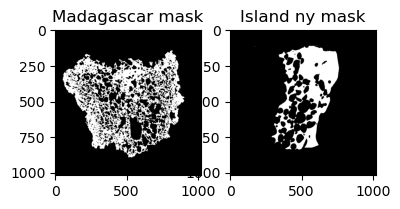

In [61]:
# plot examples from each mask
n_slice = 500
plt.figure()
plt.subplot(1,2,1)
plt.imshow(madagaskar_bin[:,:,n_slice], cmap='gray')
plt.title('Madagascar mask')

plt.subplot(1,2,2)
plt.imshow(island_ny_bin[:,:,n_slice], cmap='gray')
plt.title('Island ny mask')

plt.show()

In [35]:
# Find the island_ny to madagaskar resolution ratio
pixel_ratio = madagaskar_pixelsize / island_ny_pixelsize
print(pixel_ratio)

1.9244921008419813


dict_keys(['facility', 'image_width', 'image_height', 'data_type', 'number_of_images', 'pixel_size', 'reference_filename', 'reference_data_type', 'thetas', 'x_positions', 'y_positions', 'z_positions', 'x-shifts', 'y-shifts', 'reference'])
21.822635650634766
(1024, 1004)
[22.34637891 21.90992619]
45.823979101759534
1.9244921008419813


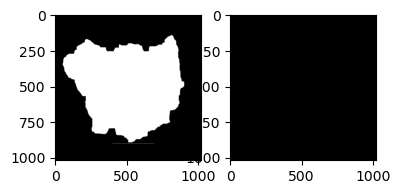

In [63]:
# Inspect meta data of the island_ny volume and calculate relevant information
print(island_ny_metadata.keys())

data_org_vol = island_vol[0]
pixel_size = island_ny_metadata['pixel_size']
print(pixel_size)

img_shape = data_org_vol.shape
print(img_shape)

img_shape_array = np.array(img_shape)
total_size = img_shape_array * pixel_size
total_size__mm = total_size/1000
print(total_size__mm)

pixel_size_mm = pixel_size/1000
pixels_per_mm = 1/pixel_size_mm
print(pixels_per_mm)

In [139]:
# calculate pixel ratio
pixel_ratio = int(np.round(madagaskar_pixelsize / island_ny_pixelsize))
print(pixel_ratio)

# calculate the new shape of the downsampled volumes
new_shape = (np.array(island_ny_bin.shape) // pixel_ratio)
print(new_shape)

# resize the binary and mask volumes to the new shape using resize function
island_ny_bin_downsampled = resize(island_ny_bin.astype(bool),new_shape)
island_ny_mask_downsampled = resize(island_ny_mask.astype(bool),new_shape)
print(island_ny_bin_downsampled.shape)

2
[509 512 502]
(509, 512, 502)


1


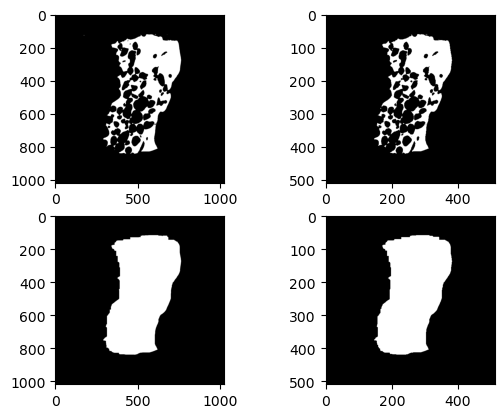

In [141]:
# plot examples from each volumne - original and downsampled
n_slice = 500
plt.figure()
plt.subplot(2,2,1)
plt.imshow(island_ny_bin[:,:,n_slice], cmap='gray')

plt.subplot(2,2,2)
plt.imshow(island_ny_bin_downsampled[:,:,250], cmap='gray')

plt.subplot(2,2,3)
plt.imshow(island_ny_mask[:,:,n_slice], cmap='gray')

print(island_ny_mask.max())

plt.subplot(2,2,4)
plt.imshow(island_ny_mask_downsampled[:,:,250], cmap='gray')
plt.show()

In [142]:
# save downsampled images
dxchange.write_tiff(island_ny_bin_downsampled.astype(np.uint8), path + "madagascar/bin_data_downsampled.tiff",dtype="uint8", overwrite=True)
dxchange.write_tiff(island_ny_mask_downsampled.astype(np.uint8), path + "madagascar/mask_downsampled.tiff", dtype="uint8", overwrite=True)